# Boston 주택 가격 예측 모델

Boston 주택 가격 예측 모델에서 사용되는 데이터셋은 보스턴 시의 주택 가격 데이터셋으로, 주택의 여러 요건과 가격 정보가 포함되어 있다.

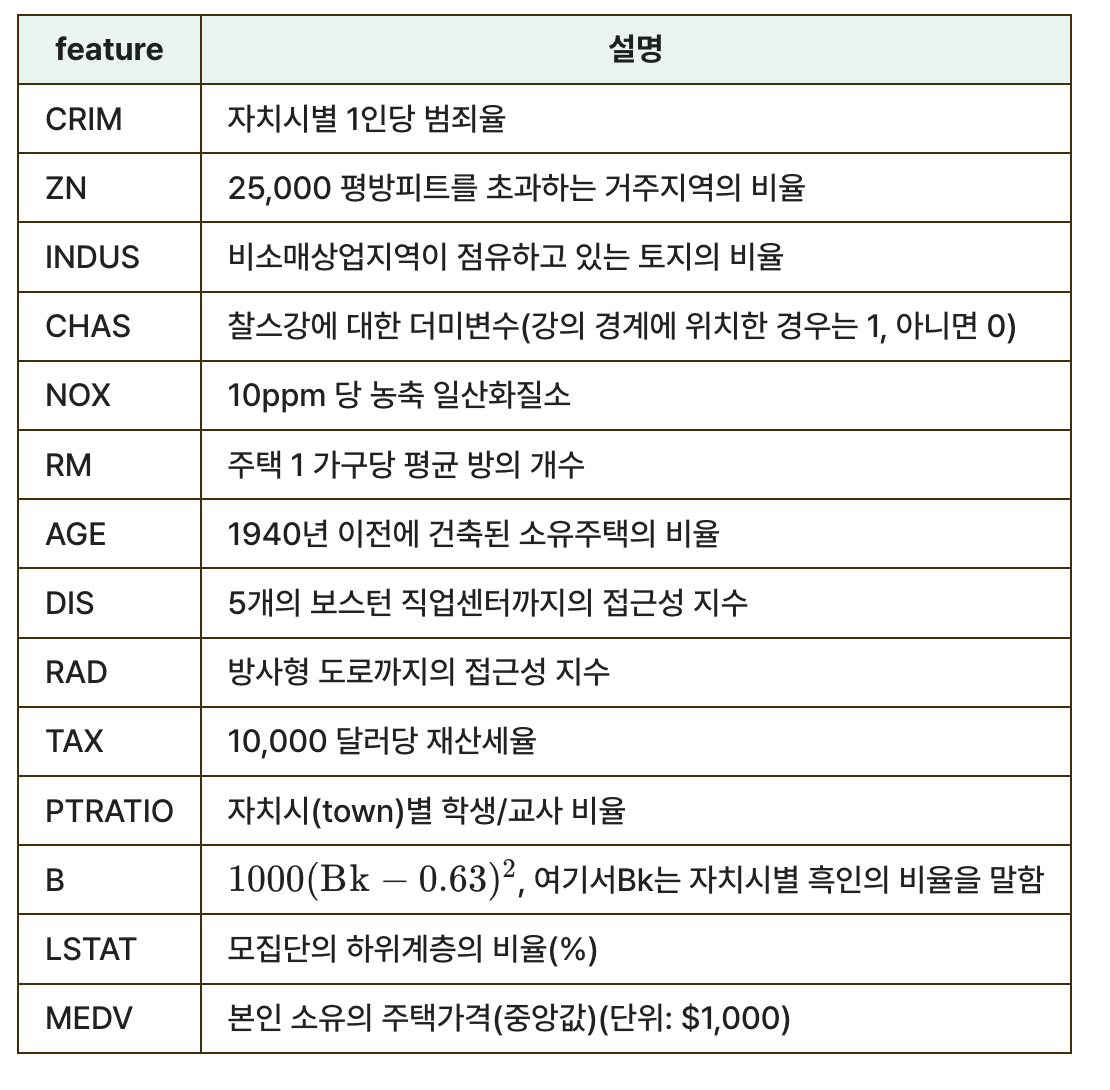

## 데이터 로드 및 전처리

먼저 데이터를 불러와 확인해 보고 전처리를 한다. 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용한다.

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


데이터셋의 전처리를 위해 표준화 작업을 수행한다.

In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train = train_data - train_data.mean(axis=0)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train = train / train_data.std(axis=0)

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test = (test_data - test_data.mean(axis=0)) / test_data.std(axis=0)

## 모델 구성 및 컴파일

주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성한다.

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(train_data.shape[1],)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(1))

model.compile(loss='mse',
                    optimizer='adam',
                    metrics=['mae'])

## 모델학습

epochs와 batch size를 조절해가며 모델을 학습한 후 모델 학습 결과를 시각화한다.

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
from tensorflow.keras import callbacks
check_point_cb = callbacks.ModelCheckpoint('keras_boston_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(train, train_labels, epochs=100,
                    validation_split=0.2, batch_size=64, verbose=1, 
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
6/6 [==============================] - 2s 44ms/step - loss: 589.2504 - mae: 22.6975 - val_loss: 645.5194 - val_mae: 23.7590
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 564.9427 - mae: 22.4462 - val_loss: 637.8449 - val_mae: 23.6517
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 546.6788 - mae: 22.1794 - val_loss: 630.6609 - val_mae: 23.5472
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 532.9593 - mae: 21.9631 - val_loss: 623.4142 - val_mae: 23.4411
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 520.6688 - mae: 21.7414 - val_loss: 614.8312 - val_mae: 23.3067
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 508.2954 - mae: 21.5167 - val_loss: 605.0862 - val_mae: 23.1456
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 497.5977 - mae: 21.3231 - val_loss: 595.6153 - val_mae: 22.9896
Epoch 8/100
6/6 [==============================] - 0s

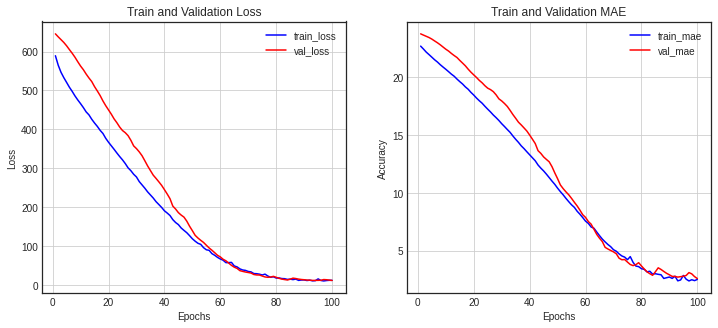

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

테스트 데이터를 가져와 모델 성능을 평가해본다.

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 27.0122 - mae: 3.9538


[27.01215934753418, 3.953777313232422]